# Card Game Assistant

This program reads in a hand of 5 cards and determines the value of each card.

#### Instructions
Run all cells in the notebook. There will be a file open box allowing you to pick any of the sample card hands. The program will display the value of all the cards in the chosen image.

#### Assumptions
This program assumes the user will use an input image of five playing cards taken from above the cards.

#### Algorithm steps:
* This Program starts off by
* It then
* Once the
* With this 
* If 
* It then 
* It now 
* Next, 
* After this,
* It then 
* Next 
* Finally,

#### Performance
The algorithm takes a very small amount of time to run, looking almost instant to the user. The program is mostly accurate, but accuracy depends on the image, so if the user wants to test an image from far away or with very bad lighting, accuracy may faulter.

#### Underlying concepts:
* Thresholding: This selects certain parts of a grayscale image based on a threshold value allowing the user to separate objects.
* Masking: This selects certain parts of an image based on a binary mask.
* Contours: This finds continuous points on a shape and can be used for object detection.
* fillPoly: This fills in an area specified by the parameters.
* GaussianBlur: 
* pytesseract:
* absDiff: 

In [1]:
#Imports
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image
import easygui
import pytesseract

plt.rcParams['figure.figsize'] = [10,15]#set the plot size
plt.rc('font', size=15)

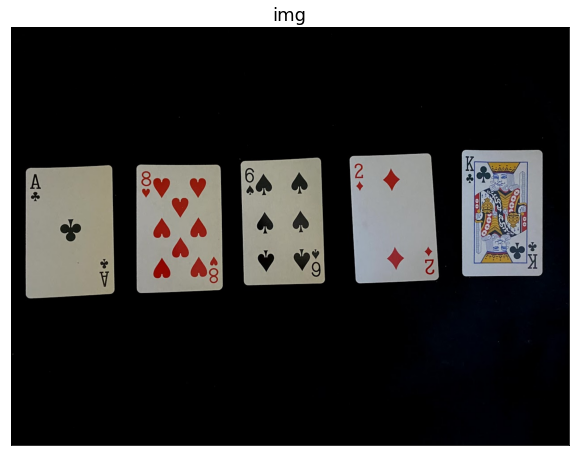

The card is: Ace of clubs


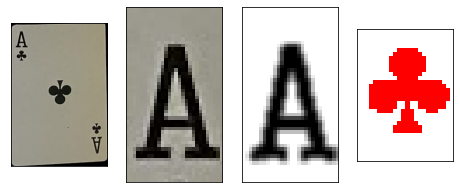

The card is: 8 of hearts


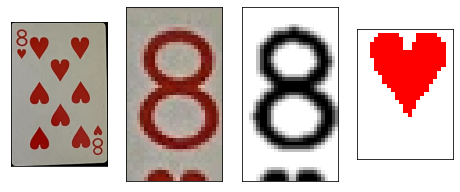

The card is: 2 of spades


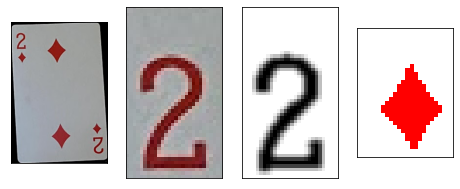

The card is: King of hearts


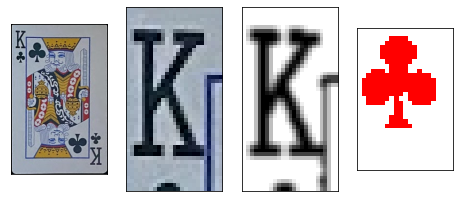

The card is: 6 of spades


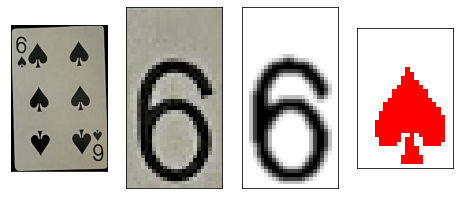

['Ace', '8', '2', 'King', '6'] ['club', 'heart', 'spade', 'heart', 'spade']


In [2]:
def GetHandType(cardLetters,cardSymbols):
    
    print(cardLetters,cardSymbols)
    
    if(cardLetters[0]==cardLetters[1] and cardLetters[1]==cardLetters[2] and cardLetters[2]==cardLetters[3] and cardLetters[3]==cardLetters[4]):
        print("Four of a kind")
    

#Use input image of the Letter in the top left to return the card type
def GetLetter(croppedLetter,fig):
    gCroppedLetter = cv2.cvtColor(croppedLetter, cv2.COLOR_BGR2GRAY)
    #Gets a threshold
    thresh = cv2.threshold(gCroppedLetter, 130, 255, cv2.THRESH_BINARY_INV)[1]
    #Blurs it with threshold
    imBlur = cv2.GaussianBlur(thresh, (3,3), 0)
    imBlur = 255 - imBlur#Invert

    #convert to text from section of image
    textFromImage = pytesseract.image_to_string(imBlur, lang='eng',config='--psm 6')
    
    #Might have picked up some corners of images etc or included spaces so get the first individual char
    if(len(textFromImage) < 2):
        singleChar = textFromImage
    else:
        singleChar = textFromImage[0]
        #print(len(textFromImage),"characters detected: "+textFromImage+"    using char:"+singleChar)
        
    cardType = ""
    #Special cards have a name so return that
    if(singleChar == "K" or singleChar == "k"):
        cardType = "King"
    elif(singleChar == "Q"):
        cardType = "Queen"
    elif(singleChar == "J" or singleChar == "j"):
        cardType = "Jack"
    elif(singleChar == "A"):
        cardType = "Ace"
    else:#is number
        cardType = singleChar
        
    #Add to plot for displaying
    p1 = fig.add_subplot(2, 5, 3), plt.xticks([]),plt.yticks([])
    imgplot = plt.imshow(imBlur, cmap='gray')
    
    return cardType

#Use the cropped image of the symbol to return the suit
def suitComparison(club, diamond, heart, spade, inputTestImage,fig):
    # Variables for comparison
    smallestDiff = 1000000000
    match = "none"
    
    
    # Performs comparison with heart.
    height, width, _ = heart.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    difference = cv2.absdiff(testImage, heart)
    currentDiff = int(np.sum(difference)/255)
    
    if currentDiff < smallestDiff:
        smallestDiff = currentDiff
        match = "heart"


    # Performs comparison with spade.
    height, width, _ = spade.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    difference = cv2.absdiff(testImage, spade)
    currentDiff = int(np.sum(difference)/255)
    
    if currentDiff < smallestDiff:
        smallestDiff = currentDiff
        match = "spade"


    # Performs comparison with club.
    height, width, _ = club.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    difference = cv2.absdiff(testImage, club)
    currentDiff = int(np.sum(difference)/255)
    
    if currentDiff < smallestDiff:
        smallestDiff = currentDiff
        match = "club"


    # Performs comparison with diamond.
    height, width, _ = diamond.shape
    dim = (width, height)
    testImage = cv2.resize(inputTestImage, dim)

    difference = cv2.absdiff(testImage, diamond)
    currentDiff = int(np.sum(difference)/255)
    
    if currentDiff < smallestDiff:
        smallestDiff = currentDiff
        match = "diamond"


    p1 = fig.add_subplot(2, 5, 4), plt.xticks([]),plt.yticks([])
    imgplot = plt.imshow(inputTestImage, cmap='gray')
    
    # Prints the match with the lowest absdiff
    return match

#Use the input image to 
def readCards(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    G = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    plt.imshow(img, cmap='gray'), plt.xticks([]),plt.yticks([])
    plt.title('img')
    plt.show()
    
    T, B = cv2.threshold(G, thresh = 120, maxval = 255, type = cv2.THRESH_BINARY)
    C,_ = cv2.findContours(B, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
    C = sorted(C, key=cv2.contourArea, reverse=True)
    
    # Reading in suit templates #Note: moved from inside loop
    club = cv2.imread("club.jpg")
    diamond = cv2.imread("diamond.jpg")
    heart = cv2.imread("heart.jpg")
    spade = cv2.imread("spade.jpg")
    
    cardLetters = [""]*5
    cardSymbols = [""]*5
    
    i = 0
    while i < 5:
        fig = plt.figure()#make a figure to show things on

        largestContour = C[i]
        x,y,w,h = cv2.boundingRect(largestContour)

        #Crop image to just the card
        ROI = img[y:y+h,x:x+w]
        H,W,Channels = ROI.shape

        cropped_letter = ROI[int(H * 0.03):int(H * 0.2), int(W * 0.04):int(W * 0.18)]
        cropped_symbol = ROI[int(H * 0.185):int(H * 0.295), int(W * 0.05):int(W * 0.17)]
        
        G = cv2.cvtColor(cropped_symbol, cv2.COLOR_BGR2GRAY)
        T = 120
        T, B = cv2.threshold(G, thresh = T, maxval = 255, type = cv2.THRESH_BINARY)
        inverse = cv2.bitwise_not(B)
        sContour,_ = cv2.findContours(inverse, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
        sC = sorted(sContour, key=cv2.contourArea, reverse=True)

        cropped = cropped_symbol
        croppedH, croppedW, croppedChannels = cropped.shape 
        cropped_symbol = np.zeros([croppedH,croppedW,3],dtype=np.uint8)
        cropped_symbol.fill(255)
        cv2.fillPoly(cropped_symbol, pts =[(sC[0])], color=(255,0,0))

        #Get cradletter from getletter method
        cardLetter = GetLetter(cropped_letter,fig )

        #Get suit from the suitComparison method
        bestMatch = suitComparison(club, diamond, heart, spade, cropped_symbol,fig)
        print("The card is: "+cardLetter+" of "+bestMatch+"s")
        
        cardLetters[i] = cardLetter
        cardSymbols[i] = bestMatch
        
        

        p1 = fig.add_subplot(2, 5, 1), plt.xticks([]),plt.yticks([])
        imgplot = plt.imshow(ROI, cmap='gray')
        p1 = fig.add_subplot(2, 5, 2), plt.xticks([]),plt.yticks([])
        imgplot = plt.imshow(cropped_letter, cmap='gray')
        plt.show()

        i = i + 1
        
    GetHandType(cardLetters,cardSymbols)
     
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

f = easygui.fileopenbox(filetypes=["*.jpg","*.jpeg","*.png"])#open user file select
inputImg = cv2.imread(f)#set a file to work with
readCards(inputImg)
        
#while True:
    #try:
        #c = cv2.waitKey(1)
        #if c == 32:#IF keycode space
        #    break
        #f = easygui.fileopenbox(filetypes=["*.jpg","*.jpeg","*.png"])#open user file select
        #inputImg = cv2.imread(f)#set a file to work with
        #readCards(inputImg)
        #break
    #except:
        #print("Error using selected file")
        #break
    
#inputImg = cv2.imread("4OfAKind.png")


